# Open Quantum Systems WS18-19
## Problem Sheet 10
The master equation approach in quantum physics: Numerical simulations of Lindblad equation

**[Iyán Méndez Veiga](mailto:iyan.mendez-veiga@uni-ulm.de)**

---

**Exercise 22**

**a)**
 1. [Runge-Kutta method](#a.1-Runge-Kutta-method)
 2. [Vectorialization + diagonalization method](#a.2-Diagonalization-method)
 3. [Comparison between methods](#a.3-Comparison-between-two-methods)

**b)**
 1. [Runge-Kutta method](#b.1-Runge-Kutta-method)
 2. [Vectorialization + diagonalization method](#b.2-Diagonalization-method)
 3. [Comparison between methods](#b.3-Comparison-between-two-methods)

**Simplification**
 1. [Runge-Kutta method](#Simplified-Runge-Kutta-method)
 2. [Vectorialization + diagonalization method](#Simplified-diagonalization-method)

**Exercise 23**

**a)** [Quantum random walker without noise](#Quantum-random-walker-without-noise)

**b)** [Quantum random walker with noise](#Quantum-random-walker-with-noise)

---

## Exercise 22

### a)

#### a.1 Runge-Kutta method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
c = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b')

In [2]:
def RK4(f, y0, t0, tf, dt):
    """
    Runge-Kutta (4th order) method to solve an initial value ODE problem.
    dy(t)/dt = f(t,y), y(t0) = y0

    Inputs:
      f is a function of both the dependent and independent variables f = f(t,y)
      y0 is the value of the function y(t) at t=t0
      t0 is the initial time
      tf is the final time
      dt is the step

    Outputs:
      (tsol, ysol) is a tuple with 2 arrays, the time array and the solution array
    """
    # If dt is > 1 use as number of steps instead of difference in time between points
    if dt > 1:
        dt = (tf-t0)/dt
    tsol = np.arange(t0, tf+dt, dt)
    ysol = np.zeros((len(tsol), len(y0), len(y0)), dtype=np.complex)
    ysol[0] = y0

    for i in range(1, len(tsol)):
        F1 = dt * f(ysol[i-1], tsol[i-1])
        F2 = dt * f(ysol[i-1] + .5*F1, tsol[i-1] + .5*dt)
        F3 = dt * f(ysol[i-1] + .5*F2, tsol[i-1] + .5*dt)
        F4 = dt * f(ysol[i-1] + F3, tsol[i-1] + dt)
        ysol[i] = ysol[i-1] + 1/6 * (F1 + 2*F2 + 2*F3 + F4)
    
    return (tsol, ysol)

In [3]:
def P1_1(rho):
    return np.real(rho[:,0,0] + rho[:,1,1])

def P2_1(rho):
    return np.real(rho[:,2,2] + rho[:,3,3])

def C12_1(rho):
    real = np.real(rho[:,1,2])
    imag = np.imag(rho[:,1,2])
    c12 = (real,imag)    
    return c12

In [4]:
def save_fig(fig, name):
    fig.savefig('Figs/png/'+name+'.png', dpi=300)
    fig.savefig('Figs/eps/'+name+'.eps', dpi=300)
    fig.savefig('Figs/svg/'+name+'.svg', dpi=300)

In [5]:
sz = np.array([[1,0],[0,-1]])
sz

array([[ 1,  0],
       [ 0, -1]])

In [6]:
sp = np.array([[0,1],[0,0]])
sp

array([[0, 1],
       [0, 0]])

In [7]:
sm = np.array([[0,0],[1,0]])
sm

array([[0, 0],
       [1, 0]])

In [8]:
idc = np.eye(2)
idc

array([[1., 0.],
       [0., 1.]])

In [9]:
J = 10
g = 0
Omega = 1
rho_t0_1 = np.array(
[[0,0,0,0],
 [0,1,0,0],
 [0,0,0,0],
 [0,0,0,0]], dtype=np.complex)

In [10]:
H = .5 * Omega * (np.kron(sz, idc) + np.kron(idc, sz)) + J * (np.kron(sp, sm) + np.kron(sm, sp))
def L(rho, t=None):
    return -1j * (H @ rho - rho @ H)
H

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0., 10.,  0.,  0.],
       [ 0.,  0.,  0., -1.]])

In [11]:
(t_s1, rho_s1) = RK4(L, rho_t0_1, 0, 1, 1000)

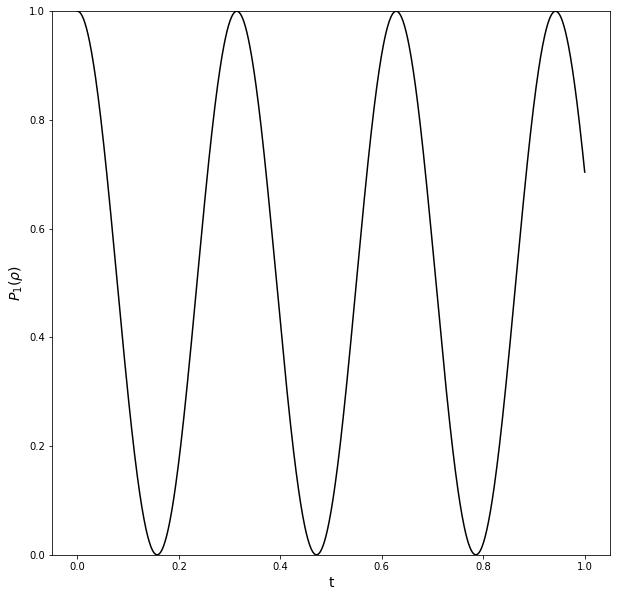

In [12]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s1, P1_1(rho_s1), 'k-', label=r'$P_1$');
#ax.plot(t_s1, P2_1(rho_s1), 'k--', label=r'$P_2$');
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22a_RK4_P')

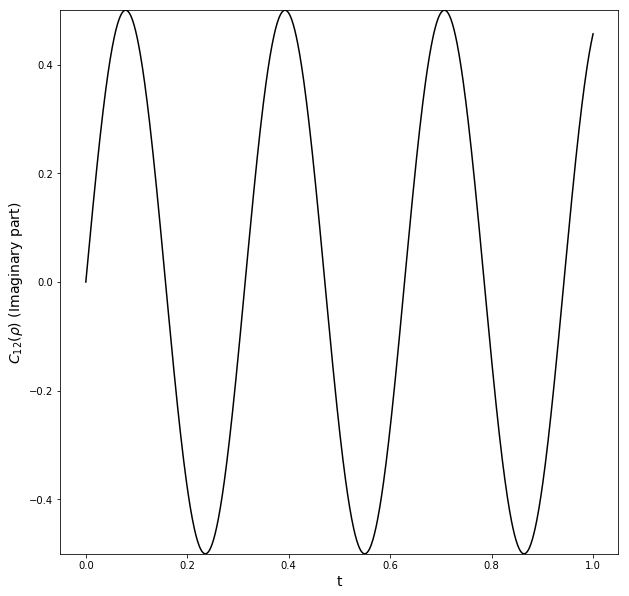

In [13]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s1, C12_1(rho_s1)[1], 'k-', label=r'$C_{12}$');
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14)
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22a_RK4_C')

#### a.2 Diagonalization method

In [14]:
def P1_2(rho):
    return np.real(rho[:,0] + rho[:,5])

def P2_2(rho):
    return np.real(rho[:,10] + rho[:,15])

def C12_2(rho):
    real = np.real(rho[:,9])
    imag = np.imag(rho[:,9])
    c12 = (real,imag)    
    return c12

In [15]:
J = 10
g = 0
Omega = 10
rho_t0_2 = np.array(
[[0,0,0,0],
 [0,1,0,0],
 [0,0,0,0],
 [0,0,0,0]], dtype=complex).reshape(16, 1, order='F')

In [16]:
H = .5 * Omega * (np.kron(sz, idc) + np.kron(idc, sz)) + J * (np.kron(sp, sm) + np.kron(sm, sp))
L = -1j * (np.kron(np.kron(idc, idc), H) - np.kron(H, np.kron(idc, idc)))

In [17]:
dL,S = np.linalg.eig(L)
dL = np.diag(np.diag(dL))
S_ = np.linalg.inv(S)

In [18]:
steps = 1000
dt = 1/steps
t_s2 = np.arange(0, 1+dt, dt)

In [19]:
rho_s2 = np.zeros((len(t_s2), 16, 1), dtype=complex)
for i in range(len(t_s2)):
    dU = S @ np.diag(np.exp(dL * t_s2[i])) @ S_
    rho_s2[i] = dU @ rho_t0_2  

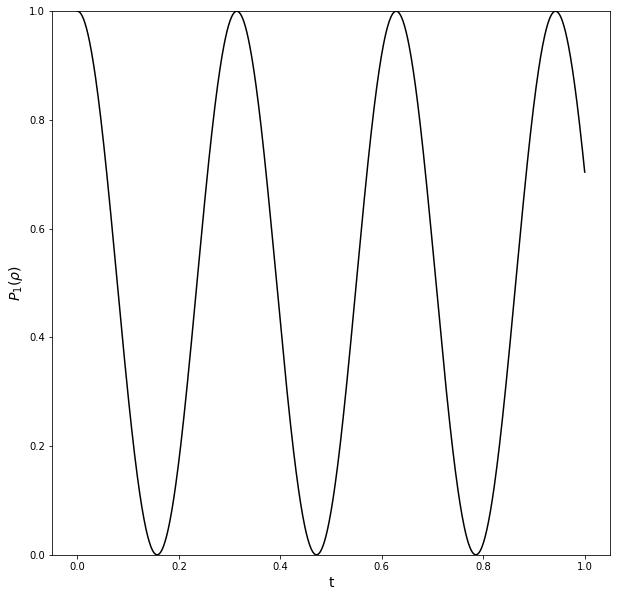

In [20]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s2, P1_2(rho_s2), 'k-', label=r'$P_1$');
#ax.plot(t_s2, P2_2(rho_s2), 'k--', label=r'$P_2$');
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22a_Diag_P')

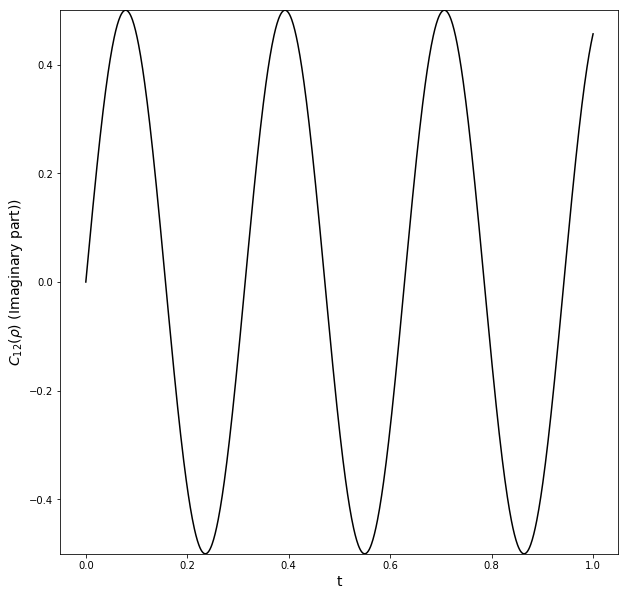

In [21]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s2, C12_2(rho_s2)[1], 'k-', label=r'$C_{12}$');
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part))', fontsize=14)
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22a_Diag_C')

#### a.3 Comparison between two methods

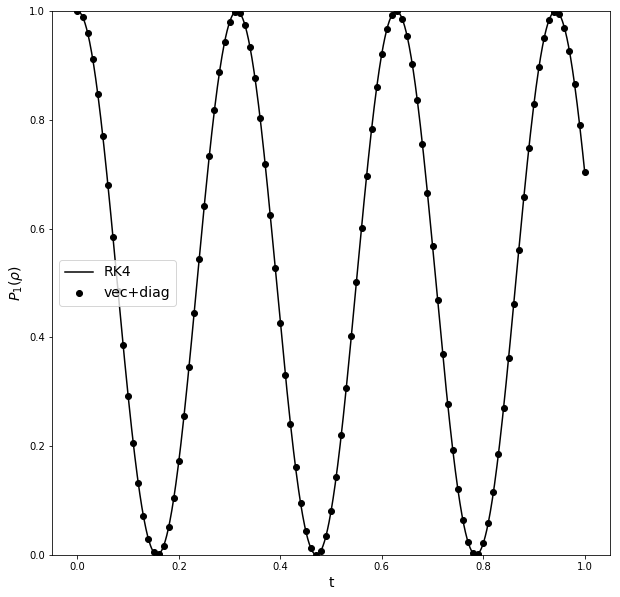

In [22]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s1, P1_1(rho_s1), 'k-', label=r'RK4');
#ax.plot(t_s1, P2_1(rho_s1), 'k--', label=r'$P_2$ (RK4)');
ax.plot(t_s2[::10], P1_2(rho_s2)[::10], 'ko', label=r'vec+diag');
#ax.plot(t_s2[::10], P2_2(rho_s2)[::10], 'kx', label=r'$P_2$ (vec+diag)');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22a_RK4vsDiag_P')

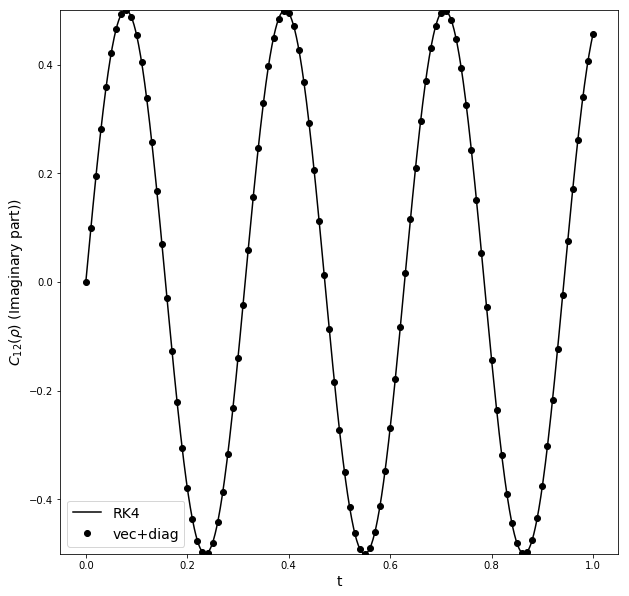

In [23]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s1, C12_1(rho_s1)[1], 'k-', label=r'RK4');
ax.plot(t_s1[::10], C12_2(rho_s2)[1][::10], 'ko', label=r'vec+diag');
ax.legend(loc=3, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part))', fontsize=14)
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22a_RK4vsDiag_C')

### b)

#### b.1 Runge-Kutta method

In [24]:
J = 10
g = np.array([1,10,100,1000])
Omega = 10
rho_t0_3 = np.array(
[[0,0,0,0],
 [0,1,0,0],
 [0,0,0,0],
 [0,0,0,0]], dtype=np.complex)

In [25]:
def generate_L(g, J=10, Omega=10):
    g = g
    J = J
    Omega = Omega
    H = .5 * Omega * (np.kron(sz, idc) + np.kron(idc, sz)) + J * (np.kron(sp, sm) + np.kron(sm, sp))
    def L(rho, t=None):
        A = -1j * (H @ rho - rho @ H)
        B = g * (np.kron(sz,idc) @ rho @ np.kron(sz,idc) - rho)
        B += g * (np.kron(idc,sz) @ rho @ np.kron(idc,sz) - rho)
        return A + B/4
    return L

In [26]:
L1 = generate_L(1)
(t_s3_g1, rho_s3_g1) = RK4(L1, rho_t0_3, 0, 1, 1000)
L10 = generate_L(10)
(t_s3_g10, rho_s3_g10) = RK4(L10, rho_t0_3, 0, 1, 1000)
L100 = generate_L(100)
(t_s3_g100, rho_s3_g100) = RK4(L100, rho_t0_3, 0, 1, 1000)
L1000 = generate_L(1000)
(t_s3_g1000, rho_s3_g1000) = RK4(L1000, rho_t0_3, 0, 1, 10000)

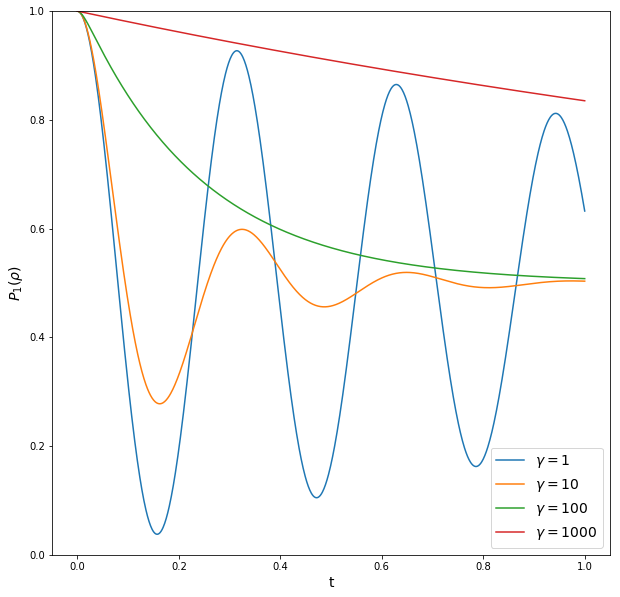

In [27]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s3_g1, P1_1(rho_s3_g1), label=r'$\gamma=1$');
ax.plot(t_s3_g1, P1_1(rho_s3_g10), label=r'$\gamma=10$');
ax.plot(t_s3_g1, P1_1(rho_s3_g100), label=r'$\gamma=100$');
ax.plot(t_s3_g1000, P1_1(rho_s3_g1000), label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22b-RK4_P')

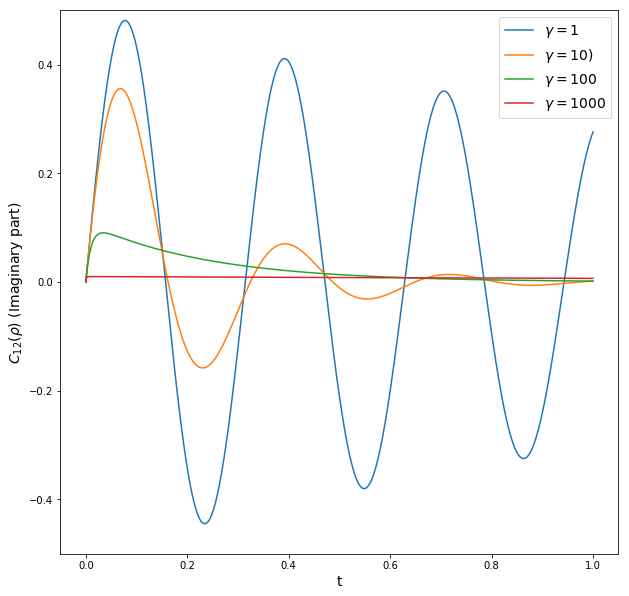

In [28]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s3_g1, C12_1(rho_s3_g1)[1], label=r'$\gamma=1$');
ax.plot(t_s3_g10, C12_1(rho_s3_g10)[1], label=r'$\gamma=10)$');
ax.plot(t_s3_g100, C12_1(rho_s3_g100)[1], label=r'$\gamma=100$');
ax.plot(t_s3_g1000, C12_1(rho_s3_g1000)[1], label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14)
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22b-RK4_C.eps')

#### b.2 Diagonalization method

In [29]:
J = 10
g = np.array([1,10,100,1000])
Omega = 10
rho_t0_4 = np.array(
[[0,0,0,0],
 [0,1,0,0],
 [0,0,0,0],
 [0,0,0,0]], dtype=np.complex).reshape(16,1, order='F')

In [30]:
def generate_L(g, J=10, Omega=10):
    g = g
    J = J
    Omega = Omega
    H = .5 * Omega * (np.kron(sz, idc) + np.kron(idc, sz)) + J * (np.kron(sp, sm) + np.kron(sm, sp))
    L = -1j * (np.kron(np.kron(idc, idc), H) - np.kron(H, np.kron(idc, idc)))
    L += g/4 * (np.kron(np.kron(sz, idc), np.kron(sz, idc)) + np.kron(np.kron(idc, sz), np.kron(idc, sz)) - 2 * np.kron(np.kron(idc, idc), np.kron(idc, idc)))
    
    return L

In [31]:
dL_g1,S_g1 = np.linalg.eig(generate_L(1))
dL_g1 = np.diag(np.diag(dL_g1))
S_g1_ = np.linalg.inv(S_g1)

dL_g10,S_g10 = np.linalg.eig(generate_L(10))
dL_g10 = np.diag(np.diag(dL_g10))
S_g10_ = np.linalg.inv(S_g10)

dL_g100,S_g100 = np.linalg.eig(generate_L(100))
dL_g100 = np.diag(np.diag(dL_g100))
S_g100_ = np.linalg.inv(S_g100)

dL_g1000,S_g1000 = np.linalg.eig(generate_L(1000))
dL_g1000 = np.diag(np.diag(dL_g1000))
S_g1000_ = np.linalg.inv(S_g1000)

In [32]:
steps = 1000
dt = 1/steps
t_s4 = np.arange(0, 1+dt, dt)

In [33]:
rho_s4_g1 = np.zeros((len(t_s4), 16, 1), dtype=complex)
rho_s4_g10 = np.zeros((len(t_s4), 16, 1), dtype=complex)
rho_s4_g100 = np.zeros((len(t_s4), 16, 1), dtype=complex)
rho_s4_g1000 = np.zeros((len(t_s4), 16, 1), dtype=complex)
for i in range(len(t_s2)):
    dU_g1 = S_g1 @ np.diag(np.exp(dL_g1 * t_s4[i])) @ S_g1_
    rho_s4_g1[i] = dU_g1 @ rho_t0_4
    dU_g10 = S_g10 @ np.diag(np.exp(dL_g10 * t_s4[i])) @ S_g10_
    rho_s4_g10[i] = dU_g10 @ rho_t0_4
    dU_g100 = S_g100 @ np.diag(np.exp(dL_g100 * t_s4[i])) @ S_g100_
    rho_s4_g100[i] = dU_g100 @ rho_t0_4
    dU_g1000 = S_g1000 @ np.diag(np.exp(dL_g1000 * t_s4[i])) @ S_g1000_
    rho_s4_g1000[i] = dU_g1000 @ rho_t0_4

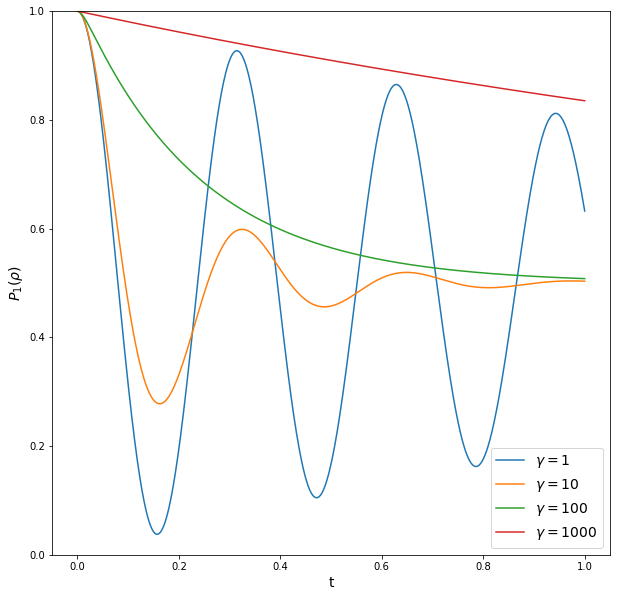

In [34]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s4, P1_2(rho_s4_g1), label=r'$\gamma=1$');
ax.plot(t_s4, P1_2(rho_s4_g10), label=r'$\gamma=10$');
ax.plot(t_s4, P1_2(rho_s4_g100), label=r'$\gamma=100$');
ax.plot(t_s4, P1_2(rho_s4_g1000), label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22b-Diag_P')

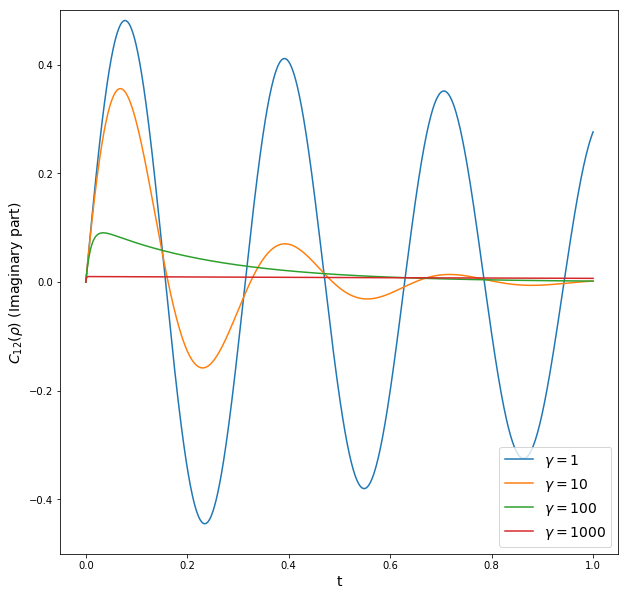

In [35]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s4, C12_2(rho_s4_g1)[1], label=r'$\gamma=1$');
ax.plot(t_s4, C12_2(rho_s4_g10)[1], label=r'$\gamma=10$');
ax.plot(t_s4, C12_2(rho_s4_g100)[1], label=r'$\gamma=100$');
ax.plot(t_s4, C12_2(rho_s4_g1000)[1], label=r'$\gamma=1000$');
ax.legend(loc=4, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14)
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22b-Diag_C')

#### b.3 Comparison between two methods

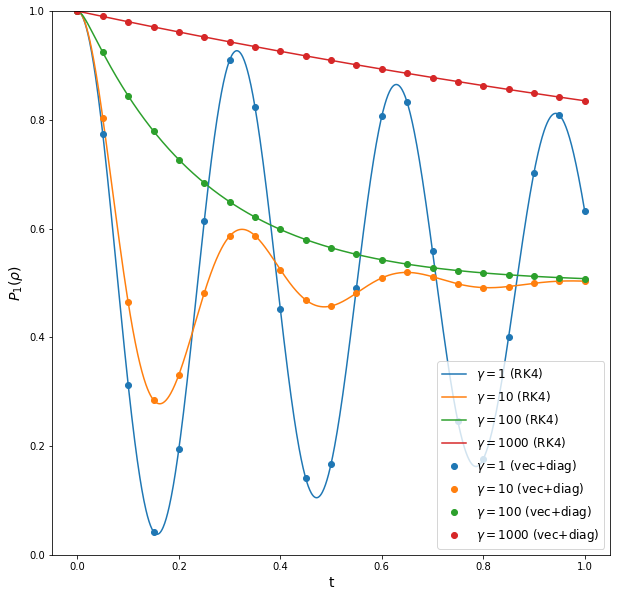

In [36]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s3_g1, P1_1(rho_s3_g1), color=c[0], label=r'$\gamma=1$ (RK4)');
ax.plot(t_s3_g10, P1_1(rho_s3_g10), color=c[1], label=r'$\gamma=10$ (RK4)');
ax.plot(t_s3_g100, P1_1(rho_s3_g100), color=c[2], label=r'$\gamma=100$ (RK4)');
ax.plot(t_s3_g1000, P1_1(rho_s3_g1000), color=c[3], label=r'$\gamma=1000$ (RK4)')
ax.plot(t_s4[::50], P1_2(rho_s4_g1)[::50], 'o', color=c[0], label=r'$\gamma=1$ (vec+diag)');
ax.plot(t_s4[::50], P1_2(rho_s4_g10)[::50], 'o', color=c[1], label=r'$\gamma=10$ (vec+diag)');
ax.plot(t_s4[::50], P1_2(rho_s4_g100)[::50], 'o', color=c[2], label=r'$\gamma=100$ (vec+diag)');
ax.plot(t_s4[::50], P1_2(rho_s4_g1000)[::50], 'o', color=c[3], label=r'$\gamma=1000$ (vec+diag)');
ax.legend(loc=0, fontsize=12);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22b_RK4vsDiag_P')

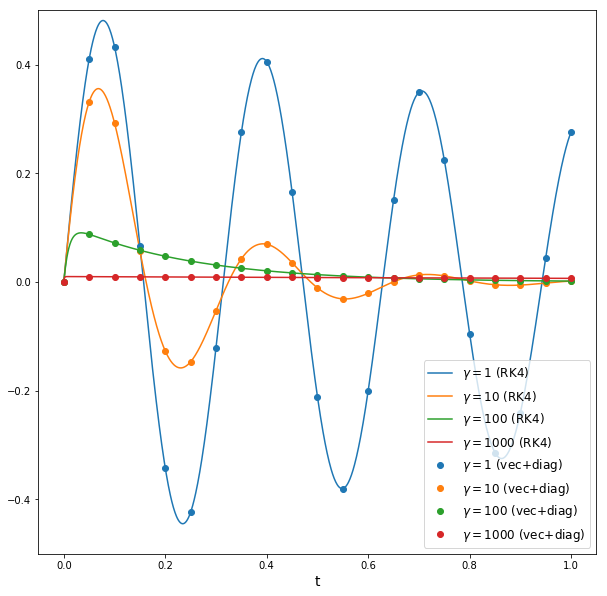

In [37]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
c = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728')
ax.plot(t_s3_g1, C12_1(rho_s3_g1)[1], color=c[0], label=r'$\gamma=1$ (RK4)');
ax.plot(t_s3_g10, C12_1(rho_s3_g10)[1], color=c[1], label=r'$\gamma=10$ (RK4)');
ax.plot(t_s3_g100, C12_1(rho_s3_g100)[1], color=c[2], label=r'$\gamma=100$ (RK4)');
ax.plot(t_s3_g1000, C12_1(rho_s3_g1000)[1], color=c[3], label=r'$\gamma=1000$ (RK4)')
ax.plot(t_s4[::50], C12_2(rho_s4_g1)[1][::50], 'o', color=c[0], label=r'$\gamma=1$ (vec+diag)');
ax.plot(t_s4[::50], C12_2(rho_s4_g10)[1][::50], 'o', color=c[1], label=r'$\gamma=10$ (vec+diag)');
ax.plot(t_s4[::50], C12_2(rho_s4_g100)[1][::50], 'o', color=c[2], label=r'$\gamma=100$ (vec+diag)');
ax.plot(t_s4[::50], C12_2(rho_s4_g1000)[1][::50], 'o', color=c[3], label=r'$\gamma=1000$ (vec+diag)');
ax.legend(loc=4, fontsize=12);
ax.set_xlabel(r't', fontsize=14);
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22b_RK4vsDiag_C')

### Simplification

#### Simplified Runge-Kutta method

In [38]:
def P1_3(rho):
    if len(rho.shape) == 2:
        return np.real(rho[0,0])
    elif len(rho.shape) == 3:
        return np.real(rho[:,0,0])

def P2_3(rho):
    if len(rho.shape) == 2:
        return np.real(rho[1,1])
    elif len(rho.shape) == 3:
        return np.real(rho[:,1,1])

def C12_3(rho):
    if len(rho.shape) == 2:
        return (rho[0,1].real, rho[0,1].imag)
    elif len(rho.shape) == 3:
        real = np.real(rho[:,0,1])
        imag = np.imag(rho[:,0,1])
        return (real,imag)

In [39]:
s1 = np.array([[1,0],[0,0]])
s1

array([[1, 0],
       [0, 0]])

In [40]:
s2 = np.array([[0,0],[0,1]])
s2

array([[0, 0],
       [0, 1]])

In [41]:
rho_t0_5 = np.array(
[[1,0],
 [0,0]], dtype=np.complex)
rho_t0_5

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [42]:
def generate_L(g, J=10, Omega=10):
    g = g
    J = J
    Omega = Omega
    H = Omega * (s1 + s2) + J * (sp + sm)
    def L(rho, t=None):
        A = -1j * (H @ rho - rho @ H)
        B = g * (s1 @ rho @ s1 + s2 @ rho @ s2 - rho)
        return A + B
    return L

In [43]:
L1 = generate_L(1)
(t_s5_g1, rho_s5_g1) = RK4(L1, rho_t0_5, 0, 1, 1000)
L10 = generate_L(10)
(t_s5_g10, rho_s5_g10) = RK4(L10, rho_t0_5, 0, 1, 1000)
L100 = generate_L(100)
(t_s5_g100, rho_s5_g100) = RK4(L100, rho_t0_5, 0, 1, 1000)
L1000 = generate_L(1000)
(t_s5_g1000, rho_s5_g1000) = RK4(L1000, rho_t0_5, 0, 1, 10000)

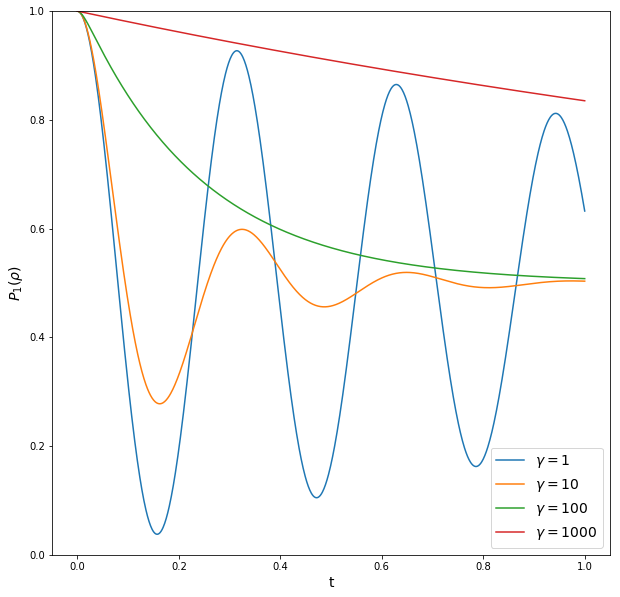

In [44]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s5_g1, P1_3(rho_s5_g1), label=r'$\gamma=1$');
ax.plot(t_s5_g10, P1_3(rho_s5_g10), label=r'$\gamma=10$');
ax.plot(t_s5_g100, P1_3(rho_s5_g100), label=r'$\gamma=100$');
ax.plot(t_s5_g1000, P1_3(rho_s5_g1000), label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22b-Simp_RK4_P')

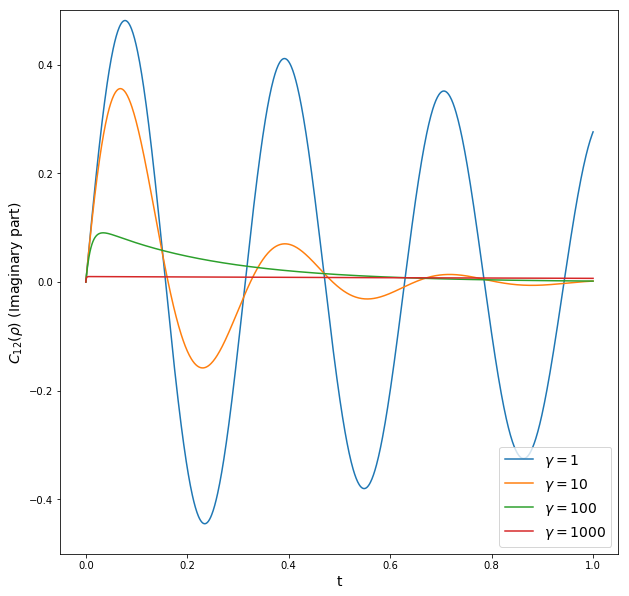

In [45]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s5_g1, C12_3(rho_s5_g1)[1], label=r'$\gamma=1$');
ax.plot(t_s5_g10, C12_3(rho_s5_g10)[1], label=r'$\gamma=10$');
ax.plot(t_s5_g100, C12_3(rho_s5_g100)[1], label=r'$\gamma=100$');
ax.plot(t_s5_g1000, C12_3(rho_s5_g1000)[1], label=r'$\gamma=1000$');
ax.legend(loc=4, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14)
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22b-Simp_RK4_C')

#### Simplified diagonalization method

In [46]:
def P1_4(rho):
    if len(rho.shape) == 2:
        return np.real(rho[0])
    elif len(rho.shape) == 3:
        return np.real(rho[:,0])

def P2_4(rho):
    if len(rho.shape) == 2:
        return np.real(rho[3])
    elif len(rho.shape) == 3:
        return np.real(rho[:,3])

def C12_4(rho):
    if len(rho.shape) == 2:
        return (rho[2].real, rho[2].imag)
    elif len(rho.shape) == 3:
        real = np.real(rho[:,2])
        imag = np.imag(rho[:,2])
        return (real,imag)

In [47]:
def generate_L(g, J=10, Omega=10):
    g = g
    J = J
    Omega = Omega
    H = Omega * (s1 + s2) + J * (sp + sm)
    L = -1j * (np.kron(idc, H) - np.kron(H, idc))
    L += g * (np.kron(s1, s1) + np.kron(s2, s2) - np.kron(idc, idc))
    
    return L

In [48]:
rho_t0_6 = np.array(
[[1,0],
 [0,0]], dtype=np.complex).reshape(4,1, order='F')

In [49]:
dL_g1,S_g1 = np.linalg.eig(generate_L(1))
dL_g1 = np.diag(np.diag(dL_g1))
S_g1_ = np.linalg.inv(S_g1)

dL_g10,S_g10 = np.linalg.eig(generate_L(10))
dL_g10 = np.diag(np.diag(dL_g10))
S_g10_ = np.linalg.inv(S_g10)

dL_g100,S_g100 = np.linalg.eig(generate_L(100))
dL_g100 = np.diag(np.diag(dL_g100))
S_g100_ = np.linalg.inv(S_g100)

dL_g1000,S_g1000 = np.linalg.eig(generate_L(1000))
dL_g1000 = np.diag(np.diag(dL_g1000))
S_g1000_ = np.linalg.inv(S_g1000)

In [50]:
steps = 1000
dt = 1/steps
t_s6 = np.arange(0, 1+dt, dt)

In [51]:
rho_s6_g1 = np.zeros((len(t_s6), 4, 1), dtype=complex)
rho_s6_g10 = np.zeros((len(t_s6), 4, 1), dtype=complex)
rho_s6_g100 = np.zeros((len(t_s6), 4, 1), dtype=complex)
rho_s6_g1000 = np.zeros((len(t_s6), 4, 1), dtype=complex)
for i in range(len(t_s6)):
    dU_g1 = S_g1 @ np.diag(np.exp(dL_g1 * t_s6[i])) @ S_g1_
    rho_s6_g1[i] = dU_g1 @ rho_t0_6
    dU_g10 = S_g10 @ np.diag(np.exp(dL_g10 * t_s6[i])) @ S_g10_
    rho_s6_g10[i] = dU_g10 @ rho_t0_6
    dU_g100 = S_g100 @ np.diag(np.exp(dL_g100 * t_s6[i])) @ S_g100_
    rho_s6_g100[i] = dU_g100 @ rho_t0_6
    dU_g1000 = S_g1000 @ np.diag(np.exp(dL_g1000 * t_s6[i])) @ S_g1000_
    rho_s6_g1000[i] = dU_g1000 @ rho_t0_6

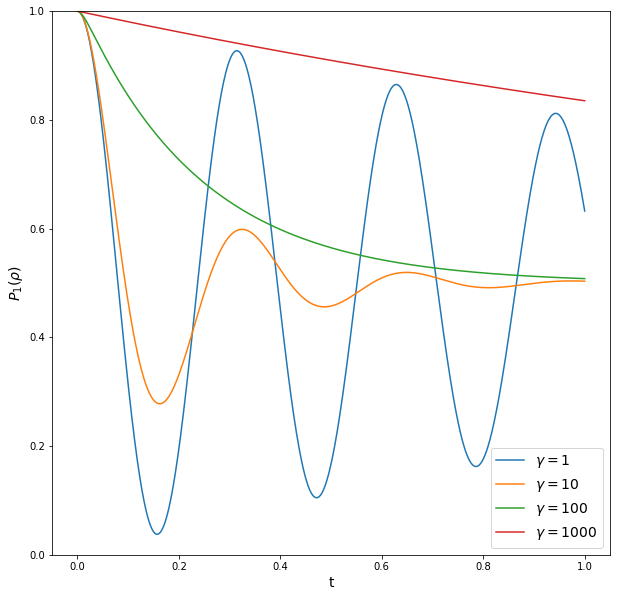

In [52]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s6, P1_4(rho_s6_g1), label=r'$\gamma=1$');
ax.plot(t_s6, P1_4(rho_s6_g10), label=r'$\gamma=10$');
ax.plot(t_s6, P1_4(rho_s6_g100), label=r'$\gamma=100$');
ax.plot(t_s6, P1_4(rho_s6_g1000), label=r'$\gamma=1000$');
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_1(\rho)$', fontsize=14);
ax.set_ybound(0,1)
save_fig(fig, 'PS10_22b-Simp_Diag_P')

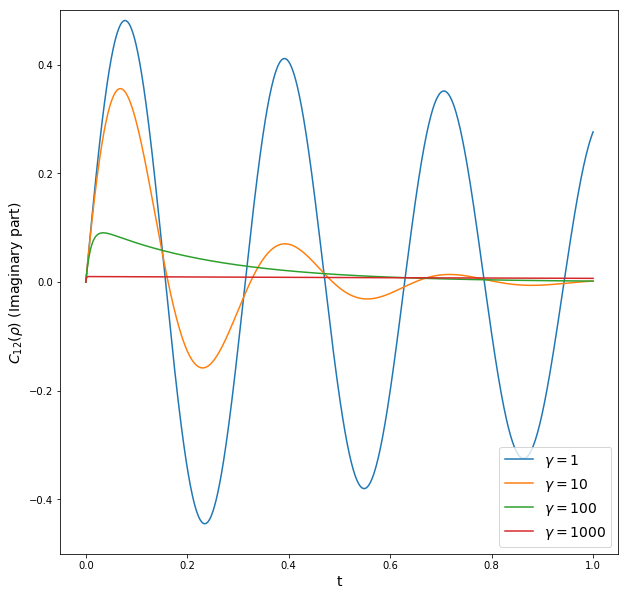

In [53]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(t_s6, C12_4(rho_s6_g1)[1], label=r'$\gamma=1$');
ax.plot(t_s6, C12_4(rho_s6_g10)[1], label=r'$\gamma=10$');
ax.plot(t_s6, C12_4(rho_s6_g100)[1], label=r'$\gamma=100$');
ax.plot(t_s6, C12_4(rho_s6_g1000)[1], label=r'$\gamma=1000$');
ax.legend(loc=4, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$C_{12}(\rho)$ (Imaginary part)', fontsize=14);
ax.set_ybound(-.5,.5)
save_fig(fig, 'PS10_22b-Simp_Diag_P')

---
## Exercise 23

### a)

#### Quantum random walker without noise

In [54]:
def P(rho, k=50):
    if rho.shape[0] != rho.shape[1]:
        p = np.real(rho[:, k, k])
    else:
        p = np.real(np.diag(rho)[k])
    return p

def mean_square_displacement(rho, k=50):
    q = rho.copy()
    msd = P(q, 0)
    for i in range(1, 101):
        msd += P(q, i) * (i - k)**2
    return np.sqrt(msd)

In [55]:
Omega = 1
J = 10

In [56]:
H = Omega * np.diag(np.ones(101)) + J * (np.diag(np.ones(100), k=1) + np.diag(np.ones(100), k=-1))

In [57]:
rho_t0_7 = np.zeros(101)
rho_t0_7[50] = 1
rho_t0_7 = np.diag(rho_t0_7)

In [58]:
def L(rho, t=None):
    return -1j * (H @ rho - rho @ H)

In [59]:
(t_s7, rho_s7) = RK4(L, rho_t0_7, 0, 1, 1000)

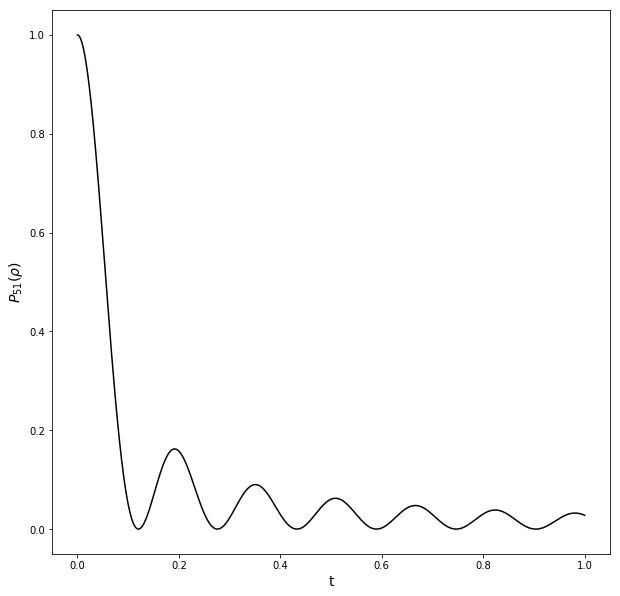

In [60]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(t_s7, P(rho_s7), 'k-');
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_{51}(\rho)$', fontsize=14);
save_fig(fig, 'PS10_23a_P51')

In [61]:
from scipy.stats import linregress
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(t_s7, mean_square_displacement(rho_s7))

In [62]:
print('''
slope = {:.3f}
intercept = {:.3f}
r_value = {:.3f}
p_value = {:.3f}
std_err = {:.3f}'''.format(slope_1, intercept_1, r_value_1, p_value_1, std_err_1))


slope = 14.142
intercept = 0.000
r_value = 1.000
p_value = 0.000
std_err = 0.000


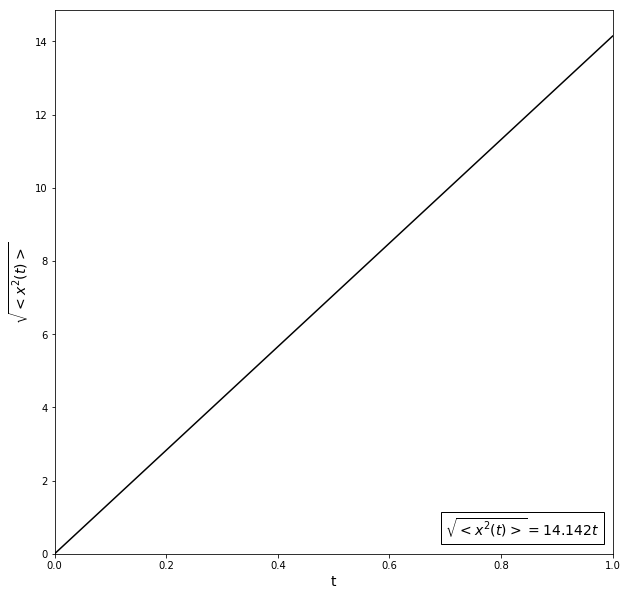

In [63]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(t_s7, mean_square_displacement(rho_s7), 'k-');
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$\sqrt{<x^2(t)>}$', fontsize=14);
ax.text(.7, .5, s=r'$\sqrt{<x^2(t)>} = 14.142 t$', fontsize=14, bbox=dict(boxstyle="square", fc="w"));
ax.set_xbound(0,1);
ax.set_ylim(bottom=0);
save_fig(fig, 'PS10_23a_mean_sq_dis')

In [64]:
(t_s8, rho_s8) = RK4(L, rho_t0_7, 0, 10, 1000)

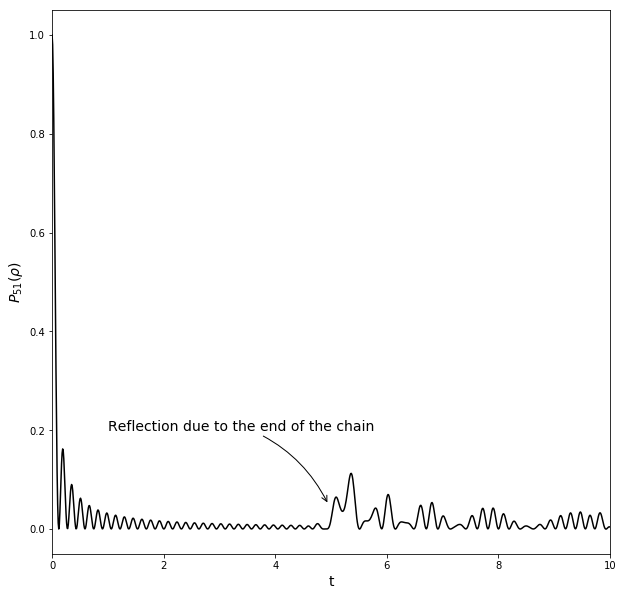

In [65]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(t_s8, P(rho_s8), 'k-');
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$P_{51}(\rho)$', fontsize=14);
ax.annotate('Reflection due to the end of the chain', xy=(4.95, 0.05), xytext=(1, .2), fontsize=14,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.2"))
ax.set_xbound(0,10)
save_fig(fig, 'PS10_23a_P51_reflection')

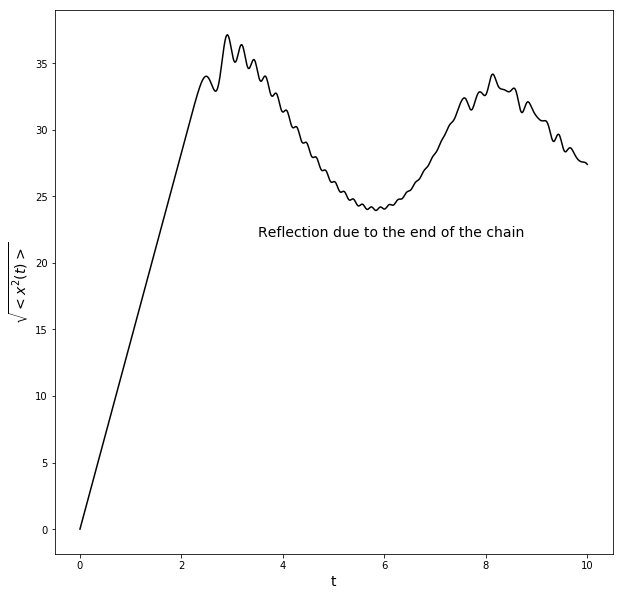

In [66]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(t_s8, mean_square_displacement(rho_s8), 'k-');
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$\sqrt{<x^2(t)>}$', fontsize=14);
ax.text(3.5, 22, 'Reflection due to the end of the chain', fontsize=14);
save_fig(fig, 'PS10_23a_mean_sq_dis_reflection')

### b)

#### Quantum random walker with noise

In [67]:
def generate_L(g, J=10, Omega=10):
    g = g
    J = J
    Omega = Omega
    H = Omega * np.diag(np.ones(101)) + J * (np.diag(np.ones(100), k=1) + np.diag(np.ones(100), k=-1))
    def L(rho, t=None):
        A = -1j * (H @ rho - rho @ H)
        B = np.diag(rho)
        B = g * (np.diag(B) - rho)
        return A + B
    return L

In [68]:
rho_t0_9 = np.diag(np.zeros(101))
rho_t0_9[50,50] = 1

In [69]:
L1 = generate_L(1)

In [70]:
L1 = generate_L(1)
(t_s9_g1, rho_s9_g1) = RK4(L1, rho_t0_9, 0, 1, 200)
L10 = generate_L(10)
(t_s9_g10, rho_s9_g10) = RK4(L10, rho_t0_9, 0, 1, 200)
L100 = generate_L(100)
(t_s9_g100, rho_s9_g100) = RK4(L100, rho_t0_9, 0, 1, 200)
L1000 = generate_L(1000)
(t_s9_g1000, rho_s9_g1000) = RK4(L1000, rho_t0_9, 0, 1, 5000)

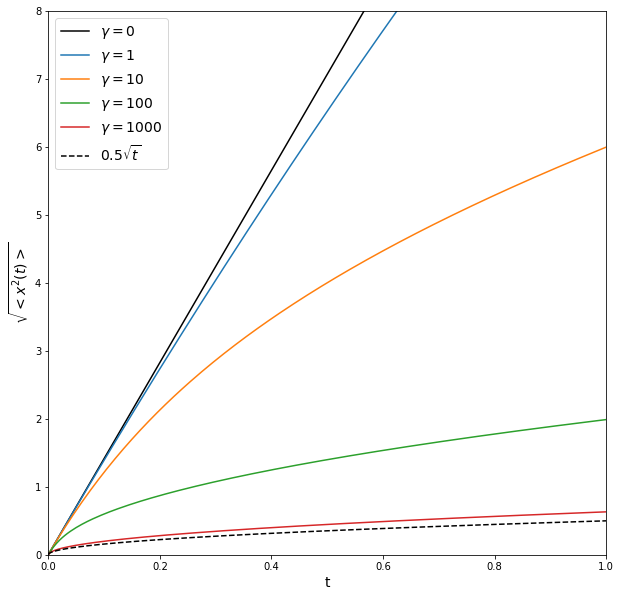

In [71]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(t_s8, mean_square_displacement(rho_s8), 'k-', label=r'$\gamma=0$');
ax.plot(t_s9_g1, mean_square_displacement(rho_s9_g1), color=c[0], label=r'$\gamma=1$');
ax.plot(t_s9_g10, mean_square_displacement(rho_s9_g10), color=c[1], label=r'$\gamma=10$');
ax.plot(t_s9_g100, mean_square_displacement(rho_s9_g100), color=c[2], label=r'$\gamma=100$');
ax.plot(t_s9_g1000, mean_square_displacement(rho_s9_g1000), color=c[3], label=r'$\gamma=1000$');
t = np.linspace(0,1,1000)
ax.plot(t, .5*np.sqrt(t), 'k--', label=r'$0.5 \sqrt{t}$')
ax.legend(loc=0, fontsize=14);
ax.set_xlabel(r't', fontsize=14);
ax.set_ylabel(r'$\sqrt{<x^2(t)>}$', fontsize=14);
ax.set_ybound(0,8)
ax.set_xbound(0,1)
save_fig(fig, 'PS10_23b_mean_sq_dis.png')